# PowerCo Customer Churn: EDA Report

**Date:** August 3, 2025  
**Author:** Costas Pinto  
**Status:** Initial Analysis Complete

---

## Part 1: Project Setup and Configuration

The analysis was structured using an industry-grade methodology to ensure reproducibility and maintainability.

- **Configuration-Driven:**  
  A centralized `Config` class was used to manage all parameters such as file paths and column names. This allows for easier updates and eliminates hardcoding.

- **Organized Outputs:**  
  A directory structure (`/plots`, `/logs`) was established to systematically store generated artifacts like visualizations and logs.

- **Environment:**  
  The analysis was conducted using the standard Python data science stack:  
  `pandas`, `seaborn`, `matplotlib`.

---

In [1]:
# --- Required Libraries ---
import logging
import os
from typing import List

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# --- Configuration ---
class Config:
    """Centralized configuration for the EDA notebook."""
    # Directories
    DATA_DIR = "datasets"
    PLOTS_DIR = "plots"
    LOGS_DIR = "logs"
    
    # Filenames
    CLIENT_DATA = "client_data.csv"
    PRICE_DATA = "price_data.csv"
    LOG_FILE = "eda_detailed.log"
    
    # Key Columns
    DATE_COLS = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']
    TARGET_COL = 'churn'

# --- Initialization & Environment Setup ---
config = Config()
os.makedirs(config.PLOTS_DIR, exist_ok=True)
sns.set_theme(style="whitegrid", palette="viridis")
plt.rcParams['figure.figsize'] = (12, 8)

print("Setup Complete. Configuration is loaded and directories are ready.")

Setup Complete. Configuration is loaded and directories are ready.


## Part 2: Data Loading and Cleaning

Initial steps involved preparing the customer dataset for further analysis.

- **Data Loading:**  
  Loaded `client_data.csv`, which contains **14,606 customer records** and **26 features**.

- **Data Cleaning:**  
  Converted key date columns (e.g., `date_activ`, `date_end`) to datetime format.

- **Validation:**  
  Assertions were implemented to ensure successful data loading and cleaning. This confirmed dataset integrity before analysis.

---

In [2]:
def load_data(path: str) -> pd.DataFrame:
    """Loads data from a specified CSV file path with robust error handling."""
    assert os.path.exists(path), f"Data file not found at: {path}"
    print(f"Loading data from: {path}")
    return pd.read_csv(path)

def clean_data(df: pd.DataFrame, date_cols: List[str]) -> pd.DataFrame:
    """Cleans the dataframe by converting specified columns to datetime objects."""
    print("Converting date columns...")
    for col in date_cols:
        df[col] = pd.to_datetime(df[col], errors='coerce')
    return df

# --- Pipeline Execution ---
client_df = load_data(os.path.join(config.DATA_DIR, config.CLIENT_DATA))
client_df = clean_data(client_df, config.DATE_COLS)

# --- Validation ---
assert not client_df.empty, "Client data failed to load or is empty."
assert pd.api.types.is_datetime64_any_dtype(client_df['date_activ']), "Date cleaning failed."

print("\n--- Data successfully loaded, cleaned, and validated. ---")
display(client_df.head())

Loading data from: datasets\client_data.csv
Converting date columns...

--- Data successfully loaded, cleaned, and validated. ---


,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


## Part 3: Data Inspection Summary

A high-level overview revealed the following characteristics of the dataset:

- **Data Structure:**  
  The dataset is structurally sound with no widespread missing values in critical columns.

- **Key Features Identified:**
  - `cons_12m` (Consumption) and `net_margin` (Profitability) are both **right-skewed**, showing a wide range of values. Most customers are low-usage/low-margin, while a few have very high values.
  - `channel_sales` contains a **'MISSING'** category for a significant number of customers. This needs to be addressed before modeling.
  - `churn` is **imbalanced** — only **9.7% of customers** are marked as churned.

---

In [3]:
# Display data types and non-null counts
print("--- Data Types and Non-Null Counts ---")
client_df.info()

--- Data Types and Non-Null Counts ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year             

## Part 4: Visual Analysis & Key Findings

Visualizations were used to identify relationships between customer attributes and churn.

### 4.1 Customer Seniority and Churn

- **Finding:**  
  Churn is not uniform across tenure.  
  Customers with **4–5 years** of service show a slightly higher churn rate.  
  → Middle-tenure may be a critical period for retention strategies.

### 4.2 Consumption and Churn

- **Finding:**  
  Annual consumption distributions for churned and non-churned customers are **heavily overlapping**.  
  Median consumption is **slightly lower** for churned customers.  
  → Consumption alone is **not a strong churn indicator**.

### 4.3 Net Margin and Churn

- **Finding:**  
  **Lower net_margin** is associated with churn.  
  Customers who churned had **visibly lower profitability**.  
  → Profitability is a **strong churn signal**.

### 4.4 Churn Rate by Sales Channel

- **Finding:**  
  Churn varies significantly by **acquisition channel**.  
  Some channels show **much higher churn rates**.  
  → Indicates **low loyalty** or **misaligned expectations** in certain channels.

---

In [4]:
# Display descriptive statistics for all columns
print("\n--- Descriptive Statistics ---")
display(client_df.describe(include='all').transpose())


--- Descriptive Statistics ---


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
id,14606,14606,563dde550fd624d7352f3de77c0cdfcd,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
channel_sales,14606,8,foosdfpfkusacimwkcsosbicdxkicaua,6754,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cons_12m,14606.0,NaN,NaN,NaN,159220.286252,0.0,5674.75,14115.5,40763.75,6207104.0,573465.264198
cons_gas_12m,14606.0,NaN,NaN,NaN,28092.375325,0.0,0.0,0.0,0.0,4154590.0,162973.059057
cons_last_month,14606.0,NaN,NaN,NaN,16090.269752,0.0,0.0,792.5,3383.0,771203.0,64364.196422
date_activ,14606,NaN,NaN,NaN,2011-01-28 07:54:18.879912448,2003-05-09 00:00:00,2010-01-15 00:00:00,2011-03-04 00:00:00,2012-04-19 00:00:00,2014-09-01 00:00:00,NaN
date_end,14606,NaN,NaN,NaN,2016-07-27 20:48:26.422018560,2016-01-28 00:00:00,2016-04-27 06:00:00,2016-08-01 00:00:00,2016-10-31 00:00:00,2017-06-13 00:00:00,NaN
date_modif_prod,14606,NaN,NaN,NaN,2013-01-02 12:29:10.951663872,2003-05-09 00:00:00,2010-08-12 00:00:00,2013-06-19 00:00:00,2015-06-16 00:00:00,2016-01-29 00:00:00,NaN
date_renewal,14606,NaN,NaN,NaN,2015-07-21 06:59:00.353279488,2013-06-26 00:00:00,2015-04-17 00:00:00,2015-07-27 00:00:00,2015-10-29 00:00:00,2016-01-28 00:00:00,NaN
forecast_cons_12m,14606.0,NaN,NaN,NaN,1868.61488,0.0,494.995,1112.875,2401.79,82902.83,2387.571531


In [5]:
def save_and_display_plot(fig: plt.Figure, filename: str, directory: str):
    """Saves a matplotlib figure and then displays it."""
    path = os.path.join(directory, filename)
    fig.savefig(path, bbox_inches='tight', dpi=150)
    print(f"Plot saved to: {path}")
    plt.show()

Plot saved to: plots\1_churn_distribution.png


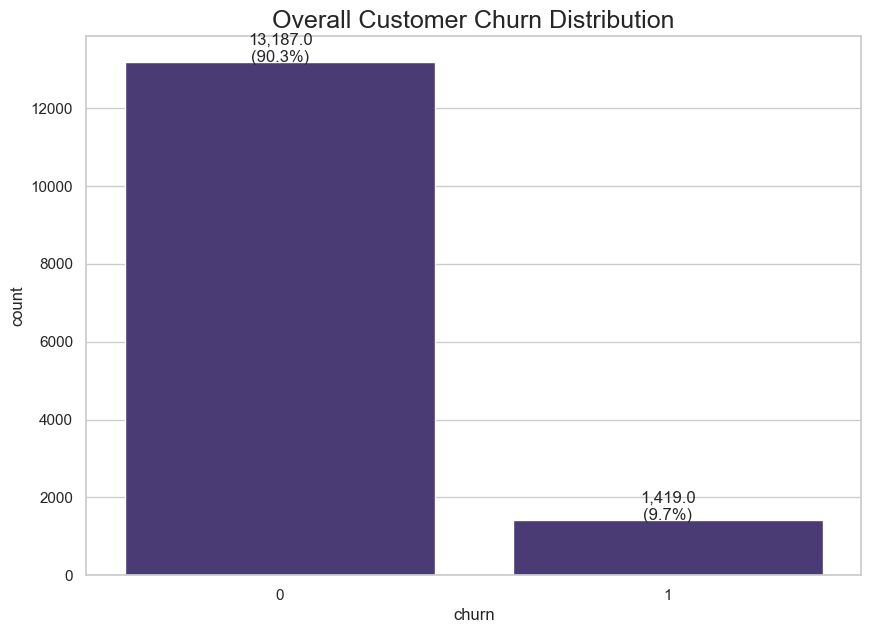

In [6]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.countplot(x=config.TARGET_COL, data=client_df, ax=ax)
ax.set_title('Overall Customer Churn Distribution', fontsize=18)

total = len(client_df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, f'{height:,}\n({100 * height / total:.1f}%)', ha="center")

save_and_display_plot(fig, "1_churn_distribution.png", config.PLOTS_DIR)

Plot saved to: plots\2_seniority_vs_churn.png


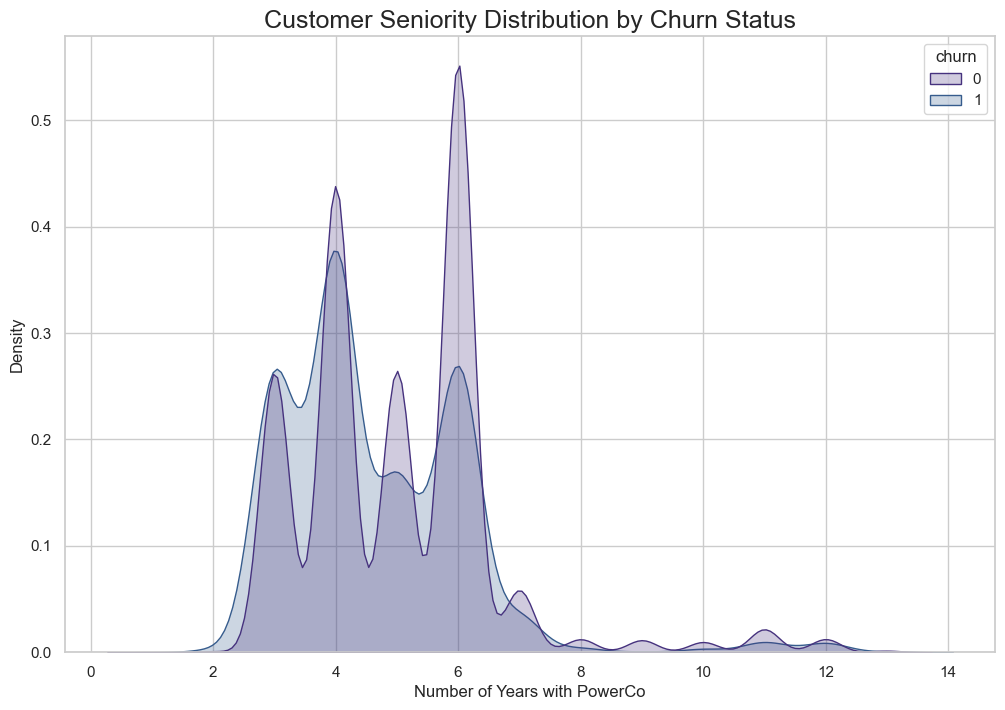

In [7]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.kdeplot(data=client_df, x='num_years_antig', hue=config.TARGET_COL, fill=True, common_norm=False)
ax.set_title('Customer Seniority Distribution by Churn Status', fontsize=18)
ax.set_xlabel('Number of Years with PowerCo')

save_and_display_plot(fig, "2_seniority_vs_churn.png", config.PLOTS_DIR)

Plot saved to: plots\3_consumption_vs_churn.png


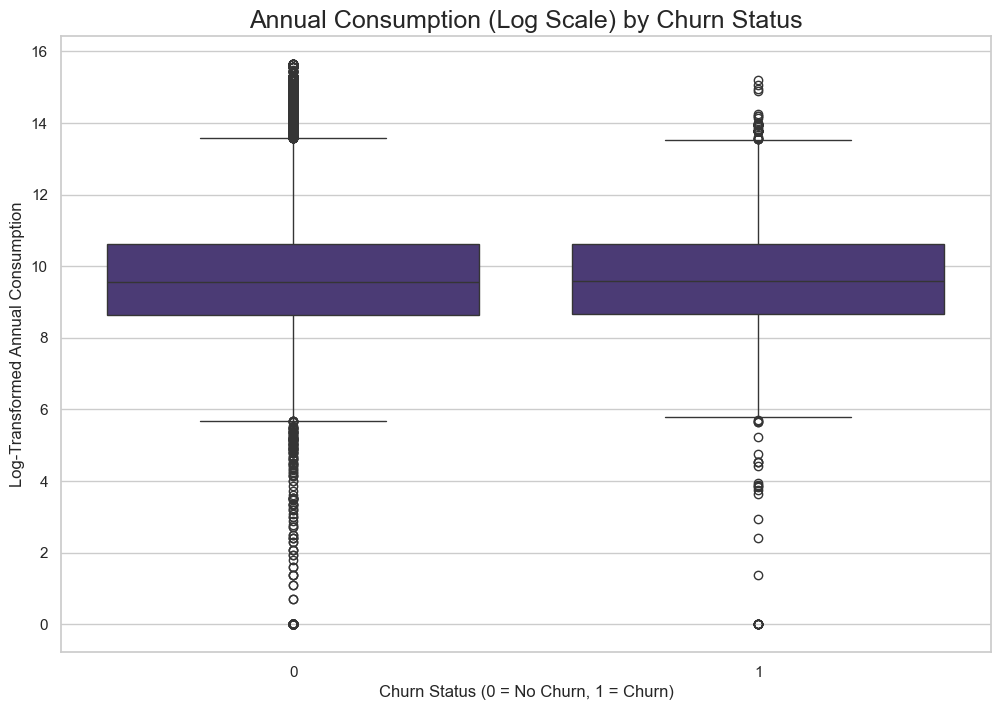

In [8]:
fig, ax = plt.subplots(figsize=(12, 8))
client_df['cons_12m_log'] = np.log1p(client_df['cons_12m'])
sns.boxplot(x=config.TARGET_COL, y='cons_12m_log', data=client_df)
ax.set_title('Annual Consumption (Log Scale) by Churn Status', fontsize=18)
ax.set_xlabel('Churn Status (0 = No Churn, 1 = Churn)')
ax.set_ylabel('Log-Transformed Annual Consumption')

save_and_display_plot(fig, "3_consumption_vs_churn.png", config.PLOTS_DIR)

Plot saved to: plots\4_margin_vs_churn.png


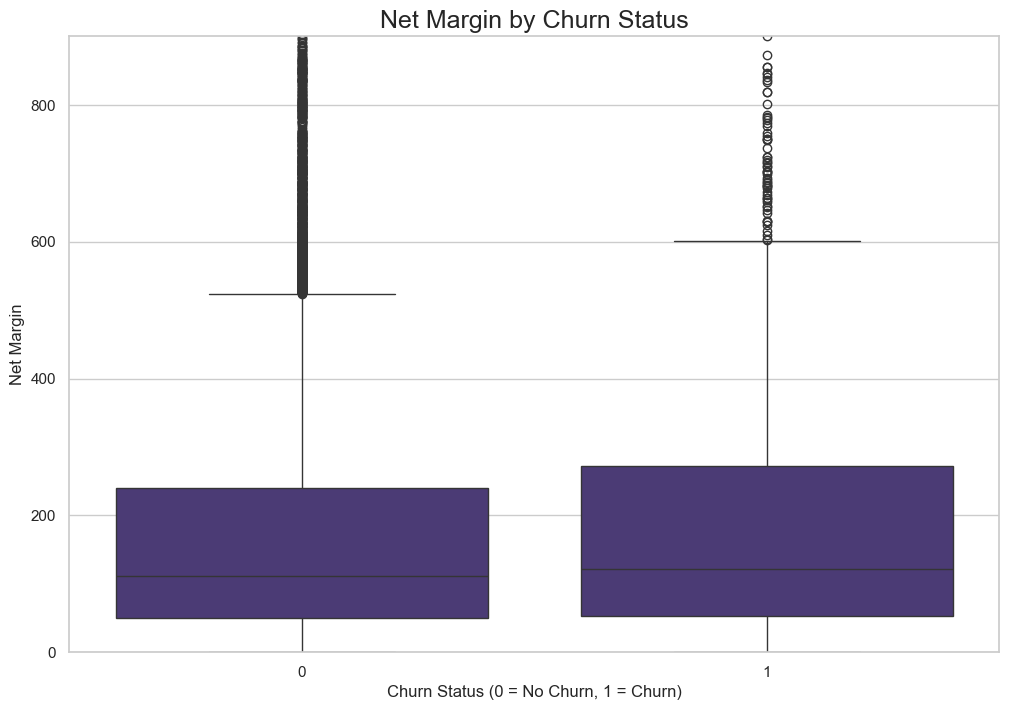

In [9]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(x=config.TARGET_COL, y='net_margin', data=client_df)
ax.set_title('Net Margin by Churn Status', fontsize=18)
ax.set_xlabel('Churn Status (0 = No Churn, 1 = Churn)')
ax.set_ylabel('Net Margin')
# Zoom in on the main distribution by limiting the y-axis
ax.set_ylim(0, client_df['net_margin'].quantile(0.99))

save_and_display_plot(fig, "4_margin_vs_churn.png", config.PLOTS_DIR)

Plot saved to: plots\5_churn_rate_by_channel.png


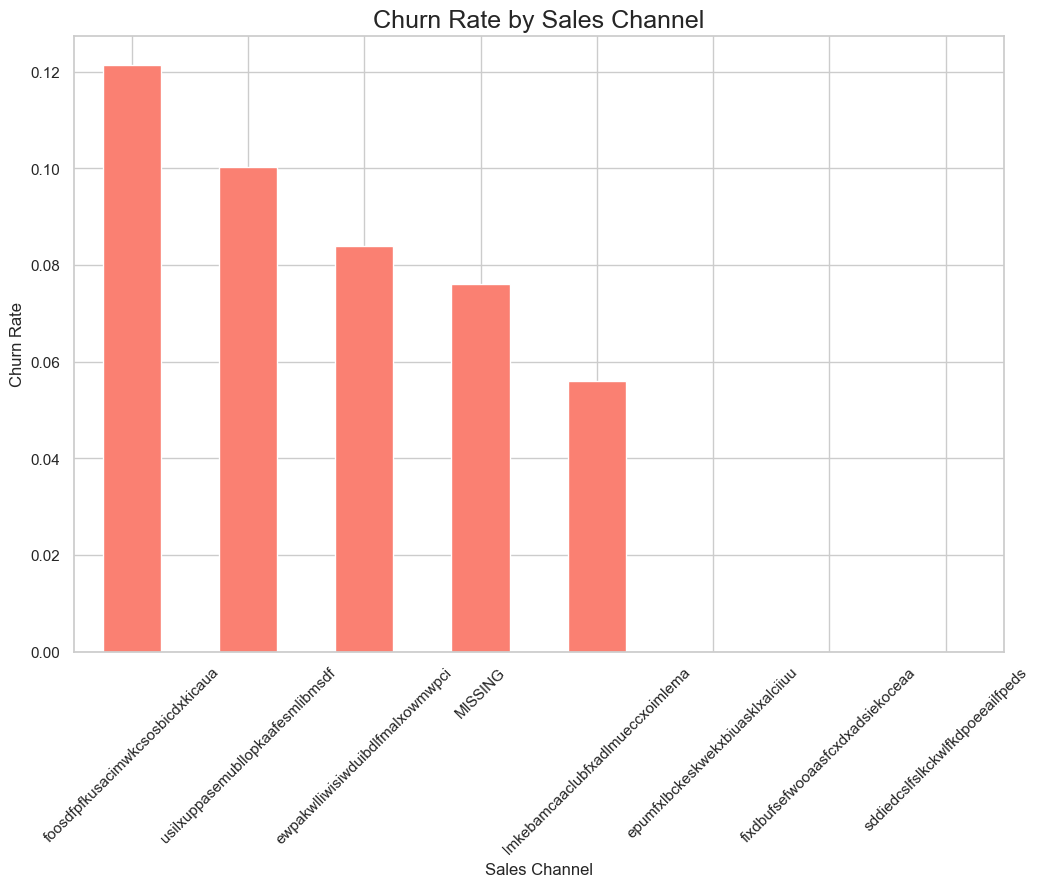

In [10]:
# Calculate churn rate by channel
churn_by_channel = client_df.groupby('channel_sales')[config.TARGET_COL].value_counts(normalize=True).unstack()
churn_by_channel = churn_by_channel.sort_values(by=1, ascending=False)

# Plot the results
fig, ax = plt.subplots(figsize=(12, 8))
churn_by_channel[1].plot(kind='bar', ax=ax, color='salmon')
ax.set_title('Churn Rate by Sales Channel', fontsize=18)
ax.set_ylabel('Churn Rate')
ax.set_xlabel('Sales Channel')
ax.tick_params(axis='x', rotation=45)

save_and_display_plot(fig, "5_churn_rate_by_channel.png", config.PLOTS_DIR)

## Part 5: Conclusion and Next Steps

The initial EDA has uncovered key insights into churn behavior:

- **Strong churn indicators:**  
  - Net margin  
  - Sales channel  

### Recommended Next Steps:

1. **Feature Engineering:**
   - Create a **tenure** feature from `date_end` – `date_activ`.
   - Join with **pricing data** to derive features like average price, price volatility, and price sensitivity.

2. **Handle Missing Values:**
   - Develop a strategy for `'MISSING'` in `channel_sales` (e.g., categorize explicitly or impute).

3. **Predictive Modeling:**
   - Build a **classification model** to predict churn.
   - Use techniques to **handle class imbalance**.
   - Leverage **key features** from the analysis for optimal performance.

---